# Solving Linear Equations

Learning objectives:
 - Matrix notation of linear systems
 - The backslash operator
 - Solving triangular systems
 - Intuitive understanding of LU with partial pivoting
 - Intuitive understanding of errors in solving linear equations
 - Efficiency and sparse systems

In [1]:
format long

## Matrix Notation of Linear Systems

With matrix notation, a system of simultaneous linear equations is written $Ax = b$. Typically, $A$ is a given square matrix of order $n$, $b$ is a given column vector of $n$ components, and $x$ is an unknown column vector of $n$ components.


For example, to solve the following linear system with three unknowns
$$
\begin{align*}
10x_{1}\text{−}7x_{2}&=7,\\
\text{−}3x_{1}+2x_{2}+6x_{3}&=4,\\
5x_{1}\text{−}x_{2}+5x_{3}&=6,
\end{align*}$$
we can express it using the matrix format
$$\left[\begin{array}{ccc}
10 & -7 & 0\\
-3 & 2 & 6\\
5 & -1 & 5
\end{array}\right]\left[\begin{array}{c}
x_{1}\\
x_{2}\\
x_{3}
\end{array}\right]=\left[\begin{array}{c}
7\\
4\\
6
\end{array}\right].$$


The solution to $Ax = b$ can be expressed as $x = A^{−1}b$, where $A^{−1}$ is the inverse of $A$. 

In [2]:
A = [10 -7 0; -3 2 6; 5 -1 5];
b = [7 4 6]';
x = inv(A) * b

x =

   0.000000000000000
  -1.000000000000000
   1.000000000000000



However, typically it is **unnecessary and inadvisable** to actually compute $A^{−1}$, because it is more expensive and less accurate.

As a simple example, when solving $7x=21$ using single precision, it is more efficient and more accurate to compute $21\div 7$:

In [3]:
% Use single-precision to demonstrate the effect of accuracy
x = single(21) / single(7)

x =  3


then computing $7^{-1}\times 21$:

In [4]:
% Use single-precision to demonstrate the effect of loss of accuracy
x = single(1 / 7) * single(21)

x =  3.00000023841858


## The MATLAB Backslash Operator

For convenience, MATLAB has introduced the notation using *backward slash* and *forward slash* operators, “\” and “/”, to denote *left division* and *right division*, respectively.

If $A$ is a matrix of any size and shape and $B$ is a matrix with as many rows as $A$, then the solution to the system of simultaneous equations 
$$AX=B$$ is denoted by 
$$X = A\ \backslash \ B.$$
This is a *left division*.

Similarly, the solution to a system with $A$ on the right and $B$ with as many columns as $A$, then
$$XA = B$$
is obtained by *right division*,
$$X = B\ / \ A.$$

For the example above,
$$\left[\begin{array}{ccc}
10 & -7 & 0\\
-3 & 2 & 6\\
5 & -1 & 5
\end{array}\right]\left[\begin{array}{c}
x_{1}\\
x_{2}\\
x_{3}
\end{array}\right]=\left[\begin{array}{c}
7\\
4\\
6
\end{array}\right],$$

In [5]:
x = A \ b

x =

   0
  -1
   1



The '\' operator works like a black box. Internally, it uses Gaussian elimination to solve the problem.

# Triangular System

The easiest linear systems involve triangular matrices. 

A lower triangular system is solved using forward solve (or forward elimination). For example, consider a lower-triangular system
$$\left[\begin{array}{ccc}
1 & 0 & 0\\
0.5 & 1 & 0\\
-0.3 & -0.04 & 1
\end{array}\right]\left[\begin{array}{c}
x_{1}\\
x_{2}\\
x_{3}
\end{array}\right]=\left[\begin{array}{c}
7\\
6\\
4
\end{array}\right].$$
We can solve it using the following MATLAB function.

In [6]:
function x = forward(L, x)
% FORWARD. Forward elimination.
% For lower triangular L, x = forward(L,b) solves L*x = b. 

    [n,n] = size(L);
    for k = 1:n
       j = 1:k-1;
       x(k) = (x(k) - L(k,j)*x(j))/L(k,k);
    end
end

Note: Octave allows defining a function directly in a script, so you could directly type the above code into an Octave environment or run it in Jupyter Notebook. However, in MATLAB functions must be defined in files, called M-files. You must save the above code into a file "forward.m" in order to call it.

The for loop on $k$ contains an implicit loop on $j$:
```
for k = 1:n
    for j = 1:k-1
        x(k) = x(k) - L(k,j)*x(j);
    end
    x(k) = x(k) / L(k,k);
end
```

In [7]:
L = [1 0 0; 0.5 1 0; -0.3 -0.04 1];
b = [7 6 4]';
x = forward(L, b)

x =

   7.00000000000000
   2.50000000000000
   6.20000000000000



We can verify its result using backslash:

In [8]:
x = L \ b

x =

   7.00000000000000
   2.50000000000000
   6.20000000000000



An upper-triangular system is solved using back substitution. For example, consider an upper-triangular system
$$\left[\begin{array}{ccc}
10 & -7 & 0\\
0 & 2.5 & 5\\
0 & 0 & 6.2
\end{array}\right]\left[\begin{array}{c}
x_{1}\\
x_{2}\\
x_{3}
\end{array}\right]=\left[\begin{array}{c}
7\\
2.5\\
6.2
\end{array}\right].$$
We can solve it using the following MATLAB function.

In [9]:
function x = backsubs(U, x)
% BACKSUBS. Back substitution.
% For upper triangular U, x = backsubs(U,b) solves U*x = b. 

[n,n] = size(U);
for k = n:-1:1
    j = k+1:n;
    x(k) = (x(k) - U(k,j)*x(j))/U(k,k);
end
end

In MATLAB, you must save the above code into a file "backsubs.m" in order to call it.

The for loop on $k$ contains an implicit loop on $j$:
```
for k = n:-1:1
    for j = k+1:n
        x(k) = x(k) - U(k,j)*x(j);
    end
    x(k) = x(k) / U(k,k);
end
```

In [10]:
U = [10 -7 0; 0 2.5 5; 0 0 6.2];
y = [7 2.5 6.2]';
x = backsubs(U, y)

x =

   0
  -1
   1



We can verify its result using backslash:

In [11]:
x = U \ y

x =

   0
  -1
   1



## LU Factorization with Partial Pivoting

For general square linear systems, the backslash operator first factorizes the matrix into the product of a lower triangular and an upper triangular matrix. In general, row interchanges are involved to avoid division by zero or near zero. 

This process is known as *LU factorization with partial pivoting*, which is equivalent to Gaussian elimination. It can be concisely expressed as 
$$PA = LU,$$
where L is lower triangular, $U$ is upper triangular, and $P$ is a permutation matrix.

A *permutation matrix* is an identity matrix with some rows and columns interchanged. It is often stored as a permutation vector. For example, $$P = \left[\begin{array}{cccc}
0 & 0 & 0 & 1\\
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{array}\right]$$

it would be stored as $p=[4, 1, 3, 2]$.

For example, for 
$$A = \left[\begin{array}{ccc}
10 & -7 & 0\\
-3 & 2 & 6\\
5 & -1 & 5
\end{array}\right],$$
we have 

$$L = \left[\begin{array}{ccc}
1 & 0 & 0\\
0.5 & 1 & 0\\
-0.3 & -0.04 & 1
\end{array}\right],\ 
U = \left[\begin{array}{ccc}
10 & -7 & 0\\
0 & 2.5 & 5\\
0 & 0 & 6.2
\end{array}\right], \mbox{ and }
P = \left[\begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 1\\
0 & 1 & 0
\end{array}\right].
$$

The algorithm of LU with partial pivoting works as follows:

In [12]:
function [L,U,p] = lutx(A)
%LUTX  Triangular factorization, textbook version
%   [L,U,p] = lutx(A) produces a unit lower triangular matrix L,
%   an upper triangular matrix U, and a permutation vector p,
%   so that L*U = A(p,:)
%
%   Copyright 2014 Cleve Moler

[n,n] = size(A);
p = (1:n)';

for k = 1:n-1

   % Find index of largest element below diagonal in k-th column
   [r,m] = max(abs(A(k:n,k)));
   m = m+k-1;

   % Skip elimination if column is zero
   if (A(m,k) ~= 0)

      % Swap pivot row
      if (m ~= k)
         A([k m],:) = A([m k],:);
         p([k m]) = p([m k]);
      end

      % Compute multipliers
      i = k+1:n;
      A(i,k) = A(i,k)/A(k,k);

      % Update the remainder of the matrix
      j = k+1:n;
      A(i,j) = A(i,j) - A(i,k)*A(k,j);
   end
end

% Separate result
L = tril(A,-1) + eye(n,n);
U = triu(A);
end

In MATLAB, you need to save the above code into a file "lutx.m" in order to call it.

You can use the MATLAB command `lugui` from [NCM](https://www.mathworks.com/matlabcentral/fileexchange/37976-numerical-computing-with-matlab) to see how the algorithm works in action.

The backslash operator essentially performs the following operations:
 1. compute LU factorization $PA = LU$;
 2. solve $Ly =Pb$ using forward elimination;
 3. solve $Ux =y$ using back substitution.
 
However, the backslash operator uses well optimized code, and it is orders of magnitude faster than the MATLAB implementation here.

In [13]:
function x = bslashtx(A, b)
% Triangular factorization
[L,U,p] = lutx(A);
% Permutation and forward elimination
y = forward(L,b(p));
% Back substitution
x = backsubs(U,y);
end

For the example above, we can solve the linear system as follows:

In [14]:
A = [10 -7 0; -3 2 6; 5 -1 5];
b = [7 4 6]';

x = bslashtx(A, b)

x =

   0
  -1
   1



## Residual and Error

When using floating-point numbers, the solution is not exact due to rounding errors.

Given $Ax = b$, let $x_*$ denote the exact solution, and $x$ denote the numerical solution. The *error* is defined as 
$$e = x - x_*,$$
and the *residual* is defined as 
$$r = b - Ax.$$

Both $e$ and $r$ are vectors.

*Gaussian elimination with partial pivoting is guaranteed to produce **small residuals**.*

When $A$ is singular, the linear equation does not have a unique solution. When $A$ is nearly singular, the solution may be sensitive to rounding errors, and hence the error may be large.

In [15]:
N = 10;

err = zeros(N, 1);
res = zeros(N, 1);

% Perform timing use a series of test matrices
for n=3:N
    A = hilb(n);
    b = A*ones(n,1);

    x = A \ b;
    
    err(n) = max(abs(x - ones(n,1)));
    res(n) = max(abs(b - A * x));    
    
    fprintf('For n=%2d, the max-error is %g ', n, err(n));
    fprintf('and the max-residual is %g\n', res(n));
end

For n= 3, the max-error is 1.11022e-16 and the max-residual is 0
For n= 4, the max-error is 4.23439e-13 and the max-residual is 1.11022e-16
For n= 5, the max-error is 5.12923e-12 and the max-residual is 0
For n= 6, the max-error is 5.4048e-10 and the max-residual is 2.22045e-16
For n= 7, the max-error is 1.73707e-08 and the max-residual is 2.22045e-16
For n= 8, the max-error is 5.07498e-07 and the max-residual is 2.22045e-16
For n= 9, the max-error is 7.15542e-06 and the max-residual is 2.22045e-16
For n=10, the max-error is 0.000337313 and the max-residual is 2.22045e-16


## Norm and Condition Number

For vectors, the *norm* is the "length" of the vector. The Euclidean norm (or 2-norm) is exactly the Euclidean length of a vector:
$$\Vert x \Vert \equiv \sqrt{\sum_i x_i^2}.$$

It is equal to the Euclidean distance from the origin to the point $x$ in $\mathbb{R}^n$.

<!--img src="https://mathsimulationtechnology.files.wordpress.com/2012/02/la_r2vector_length.jpg" alt="Euclidean distance" height="300" width="300"-->

More generally, the $p$-norm for $1\leq p \leq \infty$ of a column vector is defined as 
$$\Vert x \Vert_p \equiv \sqrt[p]{\sum_i \vert x_i\vert ^p}.$$

When $p=\infty$, the infinity-norm is $\Vert x \Vert_\infty = \max\{\vert x_i\vert\}.$

<!--img src="https://image.slidesharecdn.com/cs445linearalgebraandmatlabtutorial-150831010550-lva1-app6891/95/linear-algebra-and-matlab-tutorial-16-638.jpg" alt="Unit circles in different norms"-->

The sensitivity of a matrix is measured by its *condition number*. Intuitively, the condition number in $p$ norm is equal to the ratio of the *maximum magnification factor* of $A$ versus the *minimum magnification factor* of $A$ in $p$-norm, i.e.,
$$\kappa_p(A) = 
\frac{\max_{x\not= 0}\Vert A x\Vert_p / \Vert x\Vert_p}{\min_{x\not= 0}\Vert A x\Vert_p / \Vert x\Vert_p}.$$

<!--img src="http://mechanicaldesign.asmedigitalcollection.asme.org/data/journals/jmdedb/929508/md_136_03_031001_f001.png" alt="Stretching factor" width="500"-->

A system is *well-conditioned* if the condition number is close to 1, and it is *ill-conditioned* if the condition number is large (relative to the reciprocal of the squared root of machine epsilon).

For linear systems, $\kappa_p(A)\Vert r\Vert_p$ is an upper bound of the $\Vert e\Vert_p$. It is in general a good qualitative estimation of $\Vert e\Vert_p$.

    __line__ at line 120 column 16
    line at line 56 column 8
    __plt__>__plt2vv__ at line 500 column 10
    __plt__>__plt2__ at line 246 column 14
    __plt__ at line 113 column 17
    semilogy at line 60 column 10


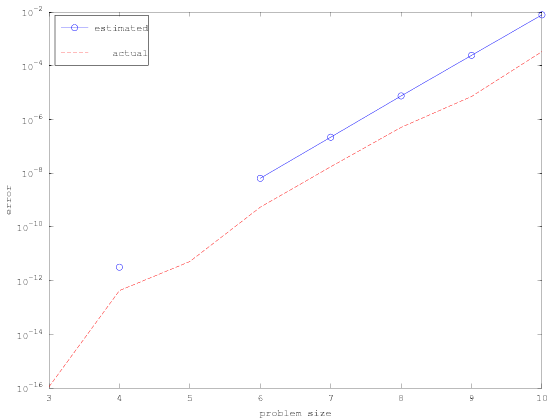

In [16]:
kappa = zeros(N, 1);

% Perform timing use a series of test matrices
for n=3:N
    kappa(n) = cond(hilb(n), inf);
end

ns = 3:N;
semilogy(ns, kappa(ns).*res(ns), 'b-o', ns, err(ns), 'r--')
xlabel('problem size')
ylabel('error')
legend('estimated', 'actual', 'Location', 'NorthWest')

For well-conditioned linear systems, Gaussian elimination with partial pivoting is guaranteed to produce **small errors**.

## Efficiency

For $n$-by-$n$ linear systems, LU factorization requires about $\frac{2}{3}n^3$ floating point operations for large $n$.

This means that if the number of unknowns grow by a factor of 2, then the computational cost will grow by a factor of 8. Therefore, it is impractical to solve very large problems using LU.

<!--It will take about 26 years to solve a problem with 1 billion unknowns on the world's fastest computer as of 2016.-->

In MATLAB, we can use tic-toc commands to perform timing.

In [17]:
N = 10;
ns = 2.^(1:N) * 16;
times = zeros(N, 1);

% Perform timing use a series of test matrices
for i=1:N
    n = ns(i);
    A = gallery('chebspec', n, 1);
    b = ones(n,1);

    tic;
    x = A \ b;
    times(i) = toc;

    fprintf('n=%5d: it took %10g seconds\n', n, times(i));
end

n=   32: it took   0.026783 seconds
n=   64: it took  0.0637879 seconds
n=  128: it took 0.000421047 seconds
n=  256: it took 0.00198388 seconds
n=  512: it took 0.00759792 seconds
n= 1024: it took  0.0300422 seconds
n= 2048: it took   0.127766 seconds
n= 4096: it took   0.751156 seconds

Restarting kernel...
Done!


[Errno 9] Bad file descriptor


In [ ]:
loglog(ns, times, 'b-o', ns, 1.e-11*ns.^3, 'r--')
xlabel('problem size')
ylabel('seconds')
legend('numerical', 'reference', 'Location', 'NorthWest')

Efficiency can be improved by taking advantage of the special structures of the matrix, for example, symmetry ($A=A^T$) and sparsity.

## Sparse Matrices and Band Matrices

Sparse matrices and band matrices occur frequently in technical computing. The sparsity of a matrix is the fraction of its elements that are zero. The MATLAB function nnz counts the number of nonzeros in a matrix, so the sparsity of $A$ is given by
```
   density  = nnz(A)/prod(size(A))
   sparsity = 1 - density
```
A sparse matrix is a matrix whose sparsity is nearly equal to 1. When a matrix is sparse, we can store only the nonzero values and their indices, and skip computations involving multiplication with zeros. This can lead to better efficiency for very larse and sparse matrices.

In MATLAB, a sparse matrix uses a special format, which is created using the [`sparse`](https://www.mathworks.com/help/matlab/ref/sparse.html) function. When the backslash operator is applied to a sparse matrix, a special sparse solver will be used.

The bandwidth of a matrix is the maximum distance of the nonzero elements from the main diagonal.
```
   [i,j] = find(A)
   bandwidth = max(abs(i-j))
```
A band matrix is a matrix whose bandwidth is small. The following is an example of a tridiagonal matrix, with bandwidth 3.

In [ ]:
A = gallery('tridiag',20);
typeinfo(A)
spy(A)

If the bandwidth is a constant independent of $n$, then by taking advantage of sparsity, Gaussian elimination with partial pivoting requires only linear time in $n$.

In [ ]:
N = 10;
ns = 2.^(1:N) * 8;
times_sparse = zeros(N, 1);
times_dense = zeros(N, 1);

% Perform timing use a series of test matrices
for i=1:N
    n = ns(i);
    A = gallery('tridiag',n);
    b = ones(n,1);

    % Solver using a sparse solver
    tic; x = A \ b; times_sparse(i) = toc;

    % Solver using dense solver
    tic; x = full(A) \ b; times_dense(i) = toc;
end

loglog(ns, times_sparse, 'b-o', ns, times_dense, 'r--')
xlabel('problem size')
ylabel('seconds')
legend('sparse', 'dense', 'Location', 'NorthWest')

The following is an example of a sparse matrix from discretizing the Poisson equation on a 2-D grid.

In [ ]:
A = gallery('poisson',5);
typeinfo(A)
spy(A)

For more general sparse matrices, the time complexity is superlinear, but in general is lower than cubic. Therefore, it is important to take advantage of sparsity.

In [ ]:
N = 4;
ns = 2.^(1:N) * 4;
times_sparse = zeros(N, 1);
times_dense = zeros(N, 1);

% Perform timing use a series of test matrices
for i=1:N
    n = ns(i);
    A = gallery('poisson', n);
    b = ones(n*n, 1);

    % Solver using a sparse solver
    tic; x = A \ b; times_sparse(i) = toc;

    % Solver using dense solver
    tic; x = full(A) \ b; times_dense(i) = toc;
end

loglog(ns.^2, times_sparse, 'b-o', ns.^2, times_dense, 'r--')
xlabel('problem size')
ylabel('seconds')
legend('sparse', 'dense', 'Location', 'NorthWest')

Acknowledgment: The material in this Notebook was adapted from Chapter 2 of Numerical Computing with MATLAB by Cleve Moler, 2004.